In [1]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
from skimage import io
import skimage.color
import math
import time
import cv2

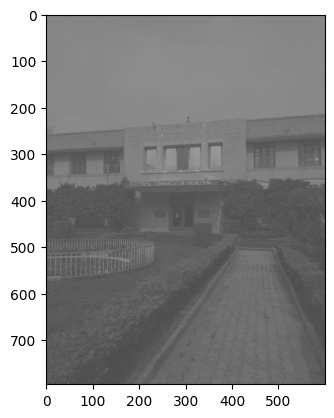

In [ ]:
## Q1. Explain why there is a difference between the actual image
##     and the displayed image. Find out a way to prevent this from happening.


import matplotlib.pyplot as plt
# from skimage.io import imread
im = io.imread("/content/ECE.png")
# show_histo(np.round(im))
plt.imshow(im, vmin=0, vmax=255, cmap="gray")
plt.show()


In [2]:
def get_hist(img_matrix, prob):
  mn = img_matrix.shape
  histo = [float(0)]*256
  for i in range (0,mn[0],1):
    for j in range (0,mn[1],1):
      x = img_matrix[i][j]
      if(prob): histo[x] += 1/mn[0]/mn[1]
      else: histo[x]+=1
  return np.array(histo)

def hist_equa(img):
  img_m = np.round(io.imread(img))
  pdf = get_hist(img_m, True)
  cdf =np.zeros(256, float)
  ptr=0
  cmul = 0
  for x in pdf:
    cmul += x
    cdf[ptr] = cmul
    ptr+=1
  mn = img_m.shape
  for i in range (0,mn[0],1):
    for j in range (0,mn[1],1):
      a= cdf[img_m[i][j]]*255
      img_m[i][j] = a

  return img_m

def NLCS(img, g):
  img_m = np.round(io.imread(img))
  mn= img_m.shape
  img_max = 0
  img_g = np.round((np.power(img_m/255, g)) * 255).astype(int)
  return img_g

def meansqr(img1, img2):
  mn = img1.shape
  mnsqr=0
  for i in range (0,mn[0],1):
    for j in range (0,mn[1],1):
      mnsqr+=(img1[i][j]-img2[i][j])**2
  return (mnsqr)

def show_histo(img_m):

  #code for bar plot
  x = np.zeros(256, dtype=int)
  for i in range (0, 256, 1):
    x[i] = i
  plt.bar(x, get_hist(img_m, False), color ='maroon', width = 0.4)
  plt.xlabel("grayscale intensity")
  plt.ylabel("frequency")
  plt.title("plot using get_hist function")
  plt.show()

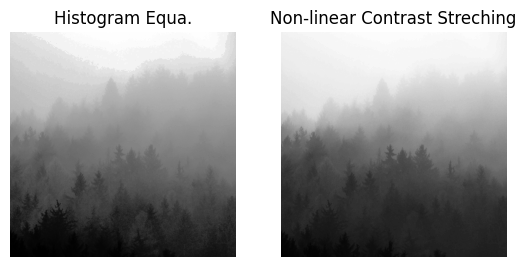

In [ ]:
# Contrast Stretching:
#     (a) Write functions to apply histogram equalization and power-law (gamma) transforms on a
#         greyscale image.
#
#     (b) Apply histogram equalization on ‘haze.png’.

img_hist = hist_equa("/content/hazy.png")
img_g = NLCS("/content/hazy.png", 3)
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Histogram Equa.")
plt.imshow(img_hist, cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Non-linear Contrast Streching")
plt.imshow(img_g , cmap="gray" )

76477721 3.0000000000000004


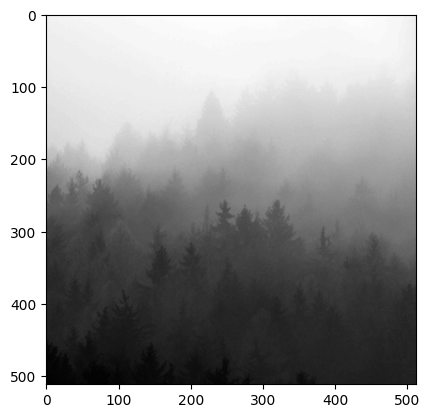

In [ ]:
# (c) Power-law (gamma) transformation: J(i, j) = I(i, j)^γ . Find the optimal parameter γ ∈ (0, 5]
#     that minimizes the mean squared error between the histogram equalized image from (b) and
#     the gamma transformed image. Use this γ to transform and display the input image.


img_hist = hist_equa("/content/hazy.png")
iters = 50
ini = 5/iters
min = float('inf')
chk = 0
for i in range (0, iters, 1):
  img_g = NLCS("/content/hazy.png", ini + i*ini)
  chk = meansqr(img_g, img_hist)
  if min>chk:
    min_g = ini + i*(ini)
    min = chk
print(min, min_g)
plt.imshow(img_hist, cmap="gray")
plt.imshow(NLCS("/content/hazy.png", min_g), cmap="gray")

In [ ]:

def rotate_Nn(img, deg):
  image = io.imread(img)
  img_m = np.round(io.imread(img))

  # Calculate grayscale values using the luminance formula (R * 0.2989 + G * 0.5870 + B * 0.1140)
  gimg_m = np.dot(img_m[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
  mn = img_m.shape
  theta = (math.pi)*deg/180
  r_wid = int(abs(mn[1]*math.cos(theta)) + abs(mn[0]*math.sin(theta)))
  r_ht = int(abs(mn[1]*math.sin(theta)) + abs(mn[0]*math.cos(theta)))
  img_rNn = np.zeros((r_ht, r_wid), int)
  r_mn = img_rNn.shape
  a1 = 0
  a2 = 0
  for i in range (0,r_mn[0],1):
    for j in range (0,r_mn[1],1):
      a1 = ((i-r_ht/2)*math.cos(-theta) + (j-r_wid/2)*math.sin(-theta) + mn[0]/2)
      a2 = ((j-r_wid/2)*math.cos(-theta) - (i-r_ht/2)*math.sin(-theta) + mn[1]/2)

      # Nearest neighbor
      if a1>=0 and a1<mn[0] and a2>=0 and a2<mn[1]:

        # Bilinear Interpolation
        x = int(a1)
        y = int(a2)

        a = a1-x
        b = a2-y
        if(a<0.5): pass
        else: x += 1

        if(b<0.5): pass
        else: y += 1

        if x+1<mn[0] and y+1<mn[1]:
          img_rNn[i,j] = gimg_m[x,y]

  return img_rNn


def rotate_Bt(img, deg):

  img_m = np.round(io.imread(img))

  # Calculate grayscale values using the luminance formula (R * 0.2989 + G * 0.5870 + B * 0.1140)
  gimg_m = np.dot(img_m[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

  mn = gimg_m.shape
  theta = (math.pi)*deg/180
  r_wid = int(abs(mn[1]*math.cos(theta)) + abs(mn[0]*math.sin(theta)))
  r_ht = int(abs(mn[1]*math.sin(theta)) + abs(mn[0]*math.cos(theta)))
  img_rBt = np.zeros((r_ht, r_wid), int)
  r_mn = img_rBt.shape
  a1 = 0
  a2 = 0
  for i in range (0,r_mn[0],1):
    for j in range (0,r_mn[1],1):
      a1 = ((i-r_ht/2)*math.cos(-theta) + (j-r_wid/2)*math.sin(-theta) + mn[0]/2)
      a2 = ((j-r_wid/2)*math.cos(-theta) - (i-r_ht/2)*math.sin(-theta) + mn[1]/2)

      if a1>=0 and a1<mn[0] and a2>=0 and a2<mn[1]:

        # Bilinear Interpolation
        x = int(a1)
        y = int(a2)

        a = a1-x
        b = a2-y

        B0 = (1-a)*(1-b)
        B1 = a*(1-b)
        B2 = (1-a)*b
        B3 = a*b
        if x+1<mn[0] and y+1<mn[1]:
          img_rBt[i,j] = B0*gimg_m[x,y] +B1*gimg_m[x+1,y] +B2*gimg_m[x,y+1] +B3*gimg_m[x+1,y+1]
  return img_rBt

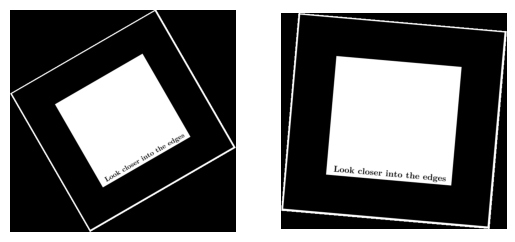

In [ ]:
# 3.Image rotation: Write a function to rotate the image ‘box.png’ in the clockwise direction by 5◦ and
#   counter-clockwise by 30◦ using both nearest neighbor or bilinear interpolation. Make sure the
#   rotated image is completely visible and not cropped. Observe the edges of the first image after
#   rotation and comment on the difference between each interpolation method.

# bilinear interpolation implimentation
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(rotate_Bt("/content/box.png", -30), cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(rotate_Bt("/content/box.png", 5) , cmap="gray" )


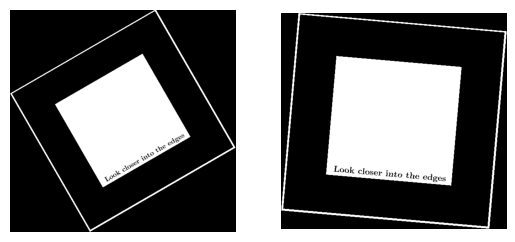

In [ ]:
# nearest neighbor implimentation
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(rotate_Nn("/content/box.png", -30), cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(rotate_Nn("/content/box.png", 5) , cmap="gray" )

In [4]:
import scipy
def spac_filt(k, img_m):
  h  = np.full((5,5), 1/25)
  mn = img_m.shape
  h_mn = h.shape
  img_c = np.zeros(mn, float)
  img_blurd = scipy.signal.convolve2d(img_m,h,mode = 'same', boundary = 'fill')
  img_g = img_m - img_blurd
  plt.imshow(img_g, cmap = "gray")
  for i in range (0, mn[0], 1):
    for j in range (0, mn[1], 1):
      # print(min(max((img_m[i][j] + k*(img_g[i][j])), 0), 255))
      temp = max((img_m[i][j] + k*(img_g[i][j])), 0)
      if temp>255:
        temp = 255
      img_c[i][j] = temp
  return img_c


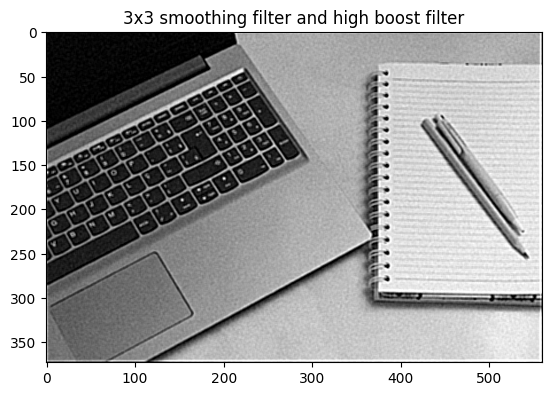

In [9]:
img_m = np.array(io.imread("/content/study.png"), float)
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title('Original image')
plt.imshow(skimage.io.imread("/content/study.png"), cmap = 'gray')
plt.subplot(2,2,2)
plt.title('Unsharp masking with 5x5 smoothing filter')
plt.imshow(spac_filt(1, img_m),cmap = 'gray')
plt.subplot(2,2,3)
plt.title('High Boost filtering with k = 2.5 using 5x5 smoothing filter')
plt.imshow(spac_filt(2.5, img_m),cmap = 'gray')
plt.subplot(2,2,4)
h  = np.full((3,3), 1/9)
img_blurd = scipy.signal.convolve2d(img_m, h, mode = 'same', boundary = 'fill')
plt.title('3x3 smoothing filter and high boost filter')
plt.imshow(spac_filt(2.5, img_blurd),cmap = 'gray')

In [ ]:
# 4. Spatial Filtering: Apply high-boost filtering on the image ‘study.png’ to sharpen it. Use
#    square averaging of size 5 to perform unsharp masking. Choose the scaling constant for the high
#    pass component as k = 2.5. Comment on what you observe. Now, blur the input image with a
#    square average filter of size 3 and perform high boost filtering again. Comment on the difference
#    in output compared to the previous case.

# h of size 3x3.
h  = np.full((3,3), 1/9)
plt.imshow(spac_filt(2.5, "/content/study.png", h), cmap= "gray")